In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [55]:
# Load dataset
file_path = "Train_Test_IoT_Motion_Light.csv"  
df = pd.read_csv(file_path)

In [56]:
df.head()

,date,time,motion_status,light_status,label,type
0,25-Apr-19,19:41:37,0,off,1,ddos
1,25-Apr-19,19:41:42,1,on,1,ddos
2,25-Apr-19,19:41:43,0,off,1,ddos
3,25-Apr-19,19:41:48,1,on,1,ddos
4,25-Apr-19,19:41:48,0,off,1,ddos


In [57]:
# Print available columns
print("Available columns:", df.columns)


Available columns: Index(['date', 'time', 'motion_status', 'light_status', 'label', 'type'], dtype='object')


In [58]:
print(df.shape)

(39488, 6)


In [59]:
# Identify the correct target column
possible_targets = ["type", "motion_status", "light_status", "label"]
target_column = next((col for col in possible_targets if col in df.columns), None)

if target_column is None:
    raise ValueError("Target variable not found. Check dataset columns.")

print(f"Using target column: {target_column}")


Using target column: type


In [60]:
# Encode categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].astype(str)
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [61]:
# Separate features and target variable
X = df.drop(columns=[target_column])
y = df[target_column]

In [62]:
# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [63]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [64]:
# Train Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [65]:
# Make predictions
y_pred = rf_classifier.predict(X_test)


In [66]:
# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Change 'weighted' to 'macro' or 'micro' if needed
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [67]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm= confusion_matrix(y_test,y_pred)

print(f"Precision: {precision* 100:.4f}")
print(f"Recall: {recall* 100:.4f}")
print(f"F1 Score: {f1* 100:.4f}")
print(f"Confusion matrix:\n{cm}")
print(classification_report(y_test, y_pred))

Accuracy: 100.00%
Precision: 100.0000
Recall: 100.0000
F1 Score: 100.0000
Confusion matrix:
[[ 504    0    0    0    0    0    0    0]
 [   0  525    0    0    0    0    0    0]
 [   0    0  523    0    0    0    0    0]
 [   0    0    0 1478    0    0    0    0]
 [   0    0    0    0  490    0    0    0]
 [   0    0    0    0    0  219    0    0]
 [   0    0    0    0    0    0  162    0]
 [   0    0    0    0    0    0    0   48]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       504
           1       1.00      1.00      1.00       525
           2       1.00      1.00      1.00       523
           3       1.00      1.00      1.00      1478
           4       1.00      1.00      1.00       490
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00       162
           7       1.00      1.00      1.00        48

    accuracy                           1.00      3949
   macro avg       1.

In [68]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)


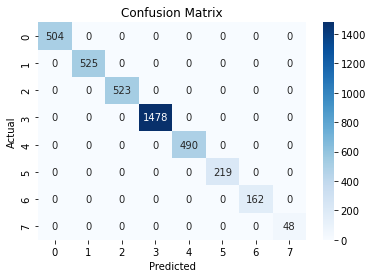

In [69]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()